# Tarefa 01

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

In [11]:
from pandas_datareader import data as web

import plotly.express as px
from plotly import graph_objects

import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt

#### 1. Baixando dados de ativos
    1. Baixe os dados de três ativos da sua escolha do Yahoo Finance, correspondente a um período de pelo menos 2 anos até a data mais recente.
    2. Salve esses dados para que você possa utilizá-los na próxima tarefa.

In [15]:
%%time
ativos = ["AAPL", "MSFT", "TSLA"]

start = dt.datetime.now() - dt.timedelta(days=365*2)
end = dt.datetime.now()

dados = {}
for ativo in ativos:
    dados[ativo] = yf.download(ativo, start=start, end=end)

for ativo in ativos:
    dados[ativo].to_csv(f"{ativo}_dados.csv")

<timed exec>:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
[*********************100%***********************]  1 of 1 completed
<timed exec>:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
[*********************100%***********************]  1 of 1 completed
<timed exec>:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
[*********************100%***********************]  1 of 1 completed

CPU times: total: 78.1 ms
Wall time: 988 ms


In [16]:
dados["AAPL"].head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-09-26,170.292038,173.500601,169.994945,173.124297,64588900
2023-09-27,168.776825,171.361509,167.410221,170.945584,66921800
2023-09-28,169.034317,170.361315,165.994089,167.697406,56294400
2023-09-29,169.549271,171.391229,168.687699,170.351411,51861100
2023-10-02,172.064651,172.609320,169.271998,169.559193,52164500


#### 2. Observando a volatilidade dentro do dia
1. Calcule a amplitude de variação do valor do ativo dentro do dia. Essa amplitude você pode calcular com um comando simples de adicionar uma coluna no Pandas: (valor máximo - valor mínimo).
2. Monte um gráfico de linha mostrando a variação dessa amplitude ao longo do período coletado, por ativo.
3. Veja se consegue identificar que ativo apresentou maior volatilidade.

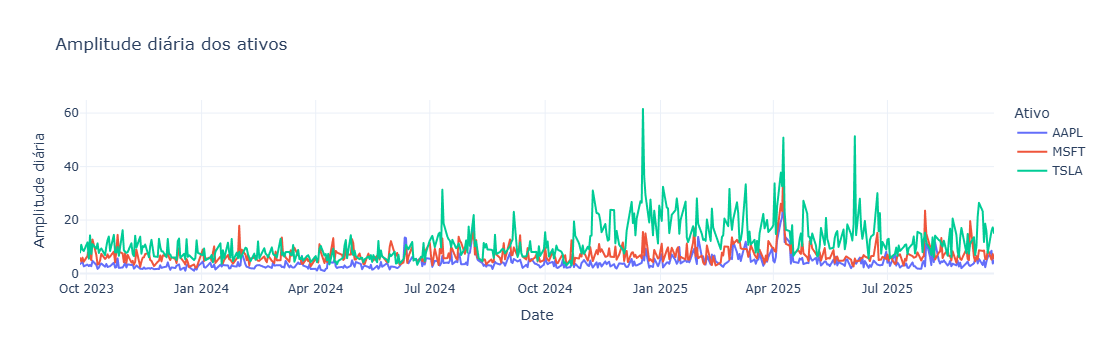

Ativo
AAPL     4.111779
MSFT     7.082342
TSLA    11.952754
Name: Amplitude, dtype: float64

In [22]:
df_list = []

for ativo in ativos:
    df = dados[ativo].copy()
    df["Amplitude"] = df["High"] - df["Low"]
    df["Ativo"] = ativo
    df_list.append(df)

df_final = pd.concat(df_list)

fig = px.line(
    df_final,
    x=df_final.index,
    y="Amplitude",
    color="Ativo",
    title="Amplitude diária dos ativos",
    labels={"Amplitude": "Amplitude diária", "x": "Data"},
    template='plotly_white'
)

fig.show()

df_final.groupby("Ativo")["Amplitude"].mean()